# Linear Regression
## Normal Equations Solution, Batch Gradient Descent, Stochastic Gradient Descent

We have a function f(x)=3+5x+2.5x^2 + eps, where eps is Gaussian noise with variance=4 (sigma=2). 

We try to build a three-feature linear regression model with batch gradient descent and stochastic gradient descent; then, we verify our model with the closed-form solution derived from the normal equations and NumPy's built in polynomial regression function.

In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# f(x)=3 + 5x + 2.5x^2 + 2(random normal)
x1 = np.linspace(0,5, num=51) #m=51
f_exact = 3 + 5*x1 + 2.5*x1*x1
f_noise = 3 + 5*x1 + 2.5*x1*x1 + 2 * np.random.randn( np.size(x1) )

In [3]:
#The feature array X contains bias, linear, quadratic terms; n=3
X = np.column_stack( ( np.ones(np.size(x1)), x1, np.square(x1) ) ) #m*n feature matrix
X_T = np.transpose(X) #n*m 

Y = f_noise #m*1 target matrix

Now that we have our feature matrix X, and target matrix Y, we can use the batch gradient descent algorithm to find our model.

In [4]:
w = np.zeros(3) #n*1 parameter vector
rate = 0.0001 #learning rate
for iterations in range(0,50000):
    #The descent = (X_T*X*w-X_T*Y)
    temp3=np.dot(X_T,X)
    temp4=np.dot(X_T,Y)
    descent = (np.dot(temp3,w) - temp4)
    
    if (np.linalg.norm(descent)<=0.01):
        print 'The parameters are ' + str(w) + " after " + str(iterations) + " iterations of BGD."
        break
    w = w - rate*descent
    
f_model_BGD = w[0] + w[1]*x1 + w[2]*x1*x1

The parameters are [ 2.25313366  5.52287821  2.4363037 ] after 18351 iterations of BGD.


We can also use the stochastic gradient descent algorithm to find a model. Note that there should be a condition for convergence when done properly.

In [5]:
w = np.zeros(3) #n*1 parameter vector
rate = 0.0001 #learning rate

iterations=0
descent=1
for count in range (0,25):
    for i in range (0,len(x1)):
        #The descent = (X[i]_T*X[i]*w-X[i]_T*Y[i]); i'th feature
        temp5=np.dot(X[i,:],X[i,:])
        temp6=np.dot(X[i,:],Y[i])
        descent = temp5*w - temp6
        w = w - rate*descent
        iterations = iterations + 1
    print 'The parameters are ' + str(w) + " after " + str(iterations) + " iterations of SGD."
f_model_SGD = w[0] + w[1]*x1 + w[2]*x1*x1

The parameters are [ 0.12051271  0.4556169   1.87029544] after 51 iterations of SGD.
The parameters are [ 0.1792741   0.67777342  2.78224215] after 102 iterations of SGD.
The parameters are [ 0.20792587  0.78609583  3.22690281] after 153 iterations of SGD.
The parameters are [ 0.22189632  0.8389133   3.44371712] after 204 iterations of SGD.
The parameters are [ 0.22870825  0.86466683  3.5494347 ] after 255 iterations of SGD.
The parameters are [ 0.23202971  0.87722412  3.60098206] after 306 iterations of SGD.
The parameters are [ 0.23364923  0.883347    3.6261163 ] after 357 iterations of SGD.
The parameters are [ 0.23443891  0.88633248  3.63837163] after 408 iterations of SGD.
The parameters are [ 0.23482395  0.88778819  3.64434726] after 459 iterations of SGD.
The parameters are [ 0.23501169  0.88849798  3.64726095] after 510 iterations of SGD.
The parameters are [ 0.23510323  0.88884407  3.64868165] after 561 iterations of SGD.
The parameters are [ 0.23514787  0.88901283  3.64937438

In [6]:
#temp1 is (X^T*X)^-1, temp2 is X^T*Y
temp1 = np.linalg.inv(  np.dot(X_T,X) )
temp2 = np.dot(X_T,Y)
# The parameter vector  w_closed=(X^T*X)^-1*X^T*Y
w_closed = temp1.dot(temp2)
print 'The closed form solution derived from the normal equations gives the parameters ' + str(w_closed)

from numpy.polynomial import polynomial as P
print 'The solution of NumPys built in polynomial fit function gives the parameters ' + str(P.polyfit(x1,f_noise,2))

The closed form solution derived from the normal equations gives the parameters [ 2.2510455   5.52479307  2.43596598]
The solution of NumPys built in polynomial fit function gives the parameters [ 2.2510455   5.52479307  2.43596598]


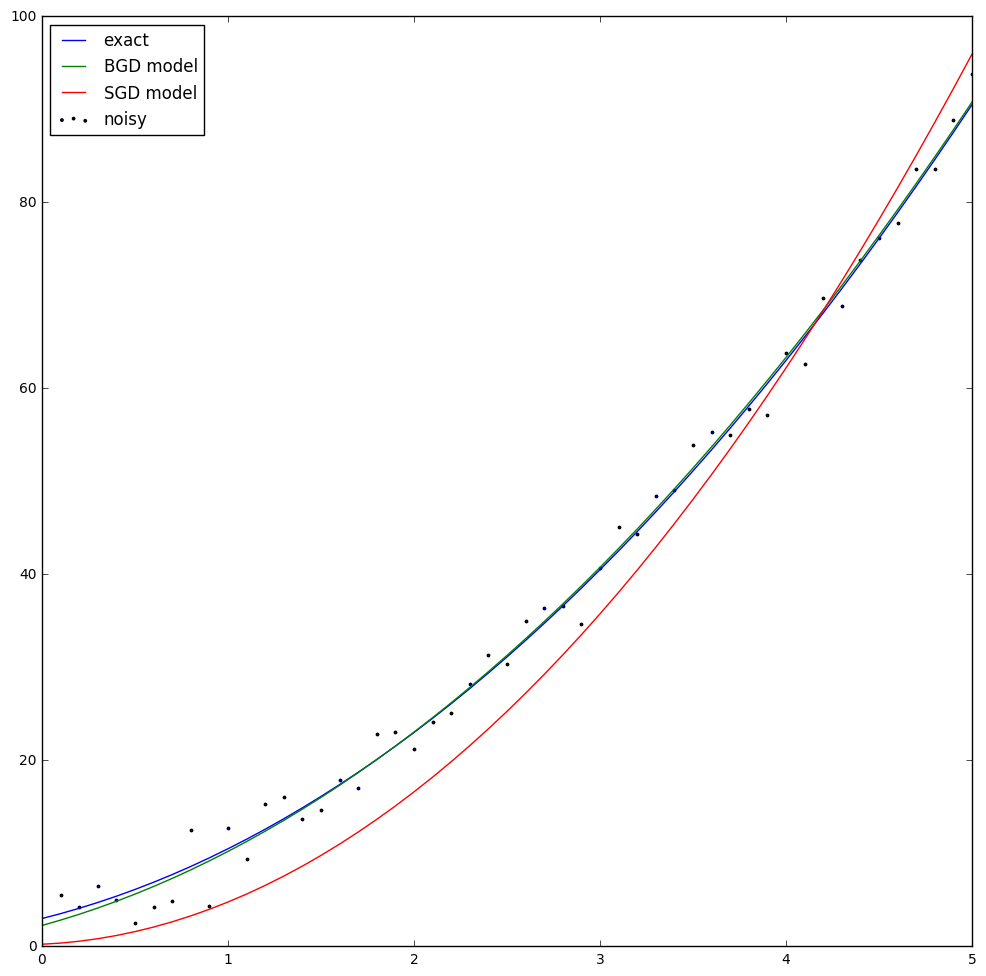

In [7]:
fig = plt.figure(figsize=(12, 12), facecolor='w', edgecolor='k', dpi=100)
ax1 = fig.add_subplot(111)
ax1.plot(x1, f_exact, label='exact')
ax1.scatter(x1, f_noise, s=3, label='noisy')
plt.ylim(0,100)
plt.xlim(0,5)
ax1.plot(x1, f_model_BGD, label='BGD model')
ax1.plot(x1, f_model_SGD, label='SGD model')
plt.legend(loc='upper left');
plt.show()